In [22]:
#Required Libraries

import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize']=[10,8]

In [8]:
#Read the data

data = pd.read_csv('D:\\ML Udemy\\Machine Learning A-Z Template Folder\\Part 3 - Classification\\Section 19 - Decision Tree Classification\\Decision_Tree_Classification\\Social_Network_Ads.csv')

In [9]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
data.shape

(400, 5)

In [31]:
#Dependent and Independent Variables

x = data[['Age','EstimatedSalary']]
y = data.iloc[:,4].values

In [13]:
#Train and Test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state =0,)

In [14]:
#feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
#fitting the model

model = DecisionTreeClassifier(criterion='entropy', random_state = 0)

model.fit(x_train,y_train)
y_predict = model.predict(x_test)


In [40]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
#score

print('accuracy_score in % :', accuracy_score(y_test,y_predict)*100)

accuracy_score in % : 90.0


In [41]:
#Confusion matrix

cm = confusion_matrix(y_test,y_predict)
cm

array([[61,  7],
       [ 3, 29]], dtype=int64)

# Visualizing

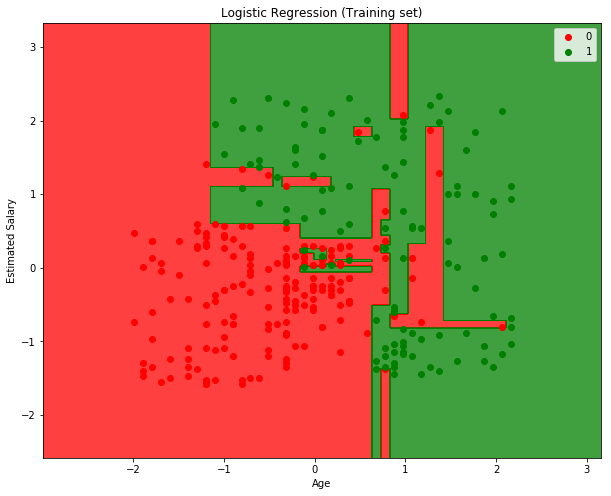

In [36]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualizing the Tree

In [37]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree

    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=x.columns,filled=True, rounded=True,special_characters=True,class_names=['0','1'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_png('xyz.png')

    return Image(graph.create_png())

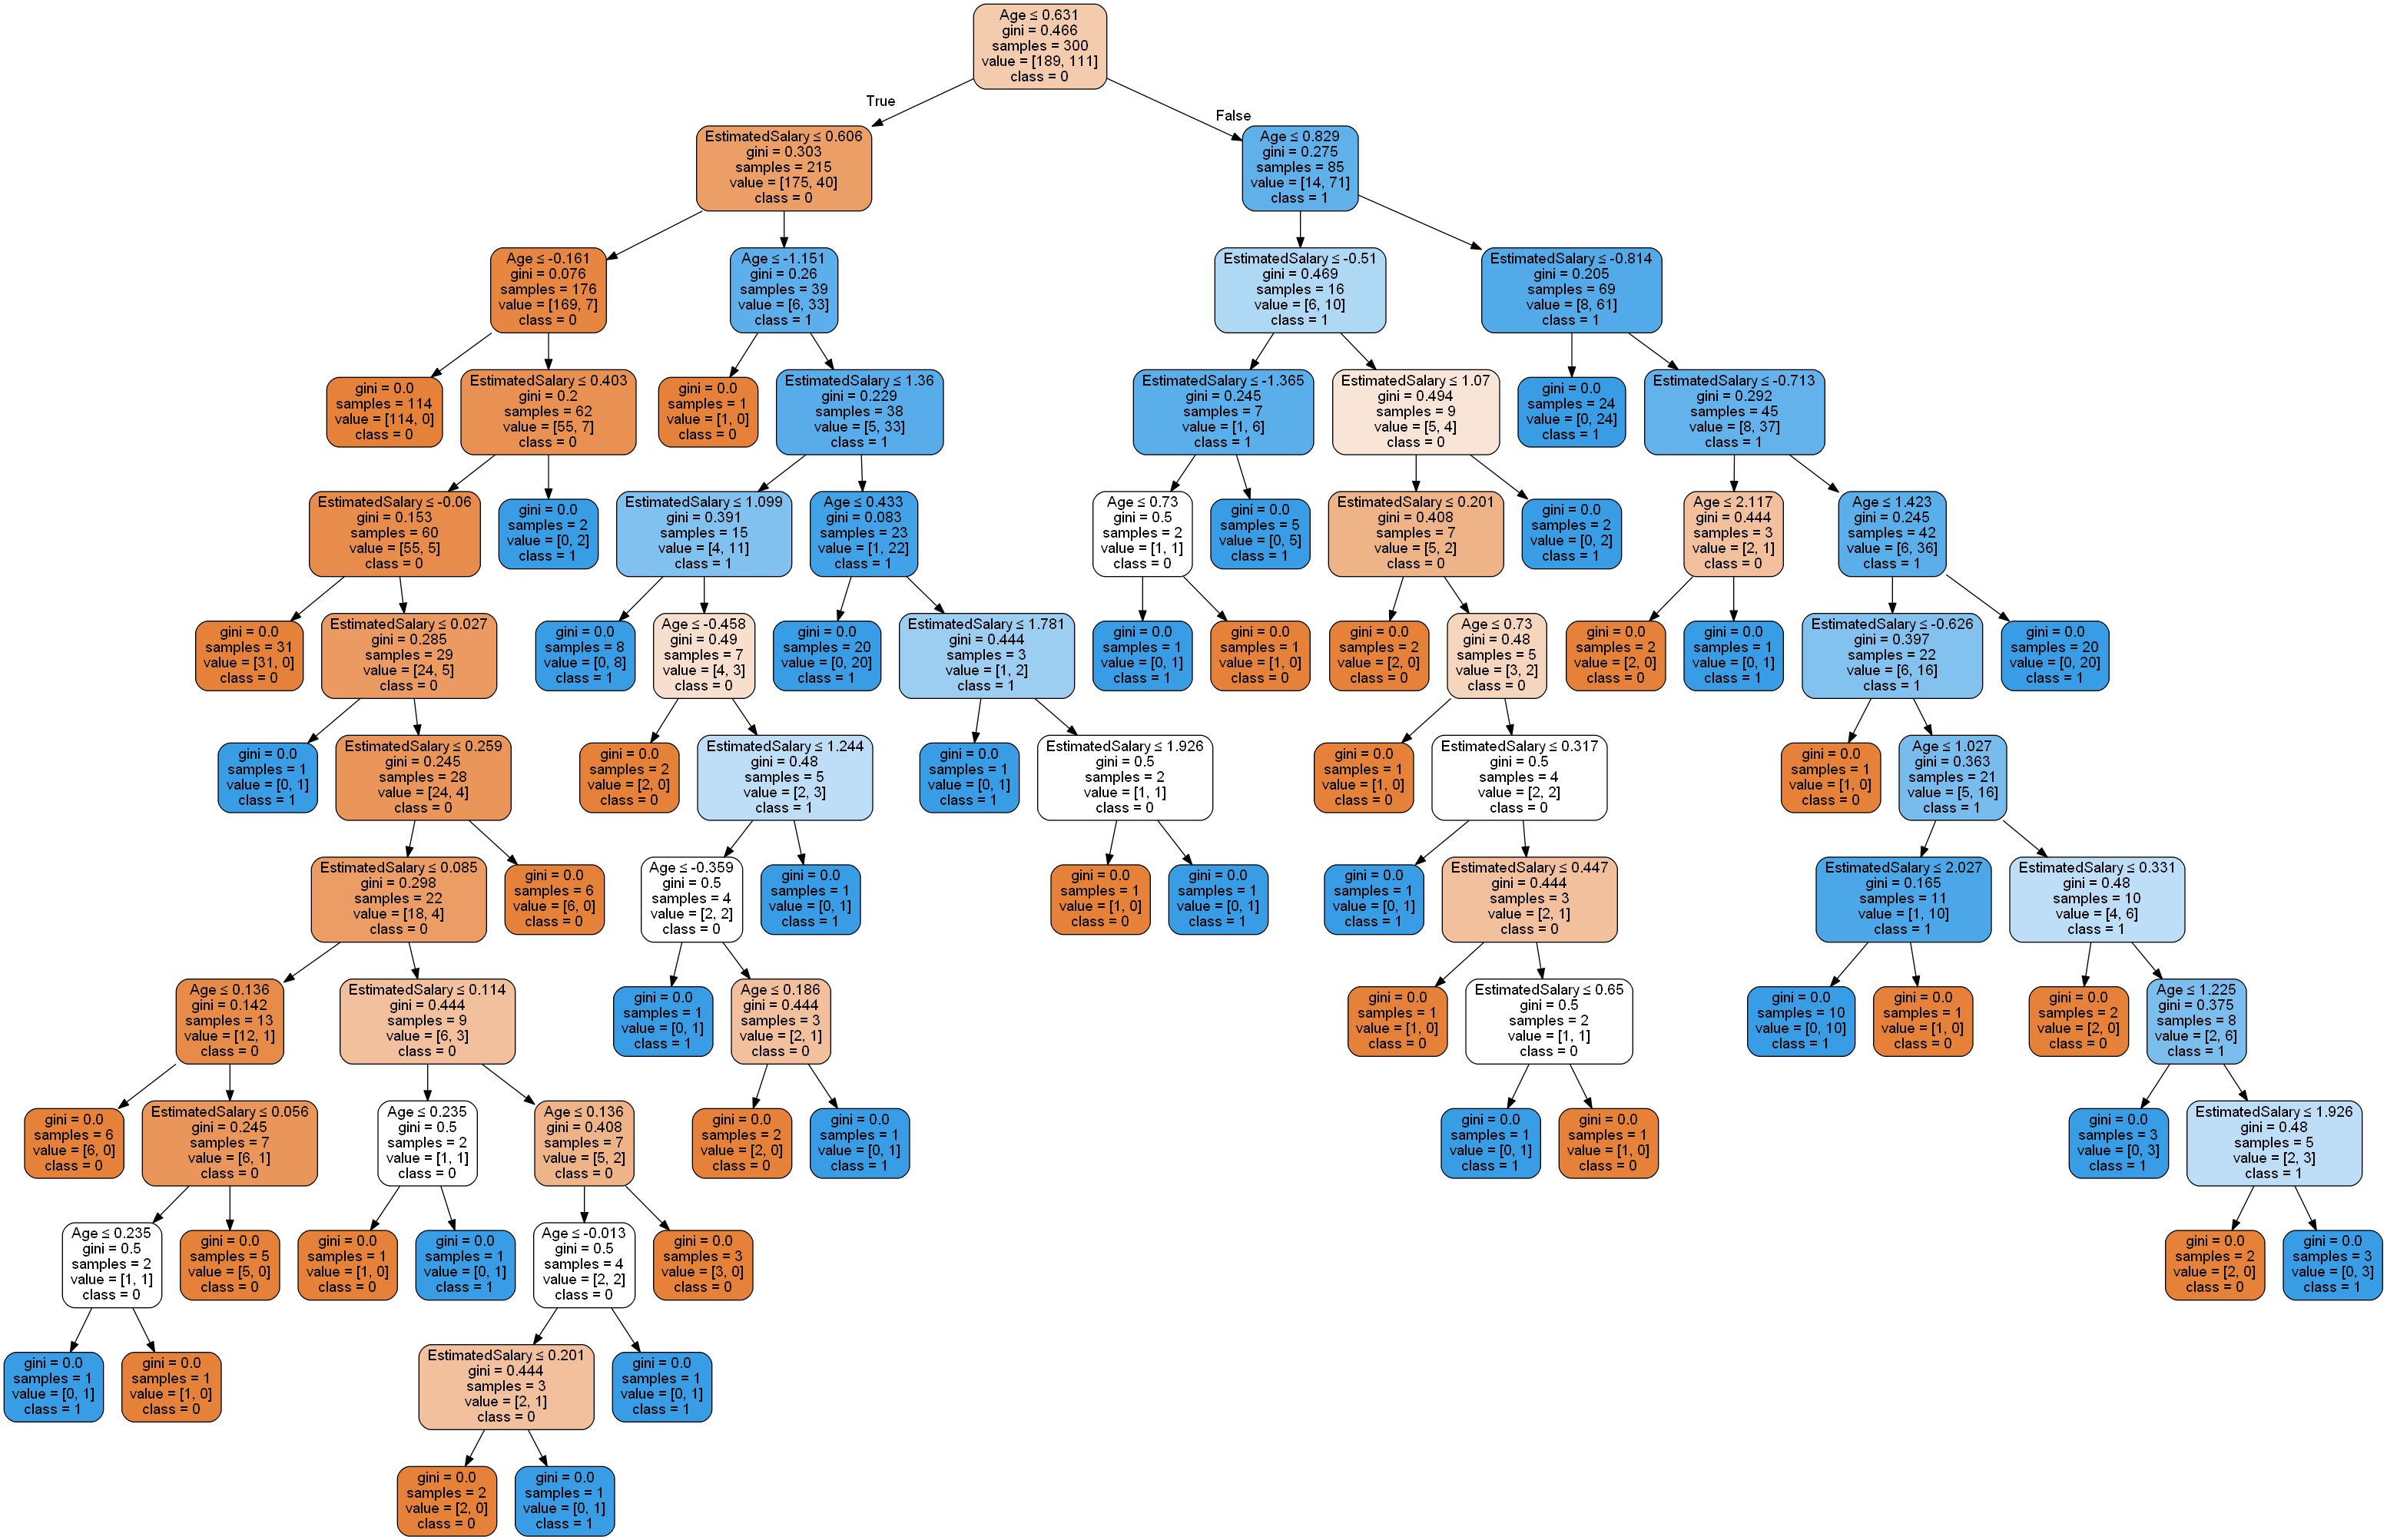

In [38]:
draw_tree(model,data.columns)